In [11]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN
import keras.losses as losses
import matplotlib.pyplot as plt


In [2]:
# 1. 데이터셋 열기
file_name = 'seoul_weather(2018.01.01~2024.01.01).csv'
df = pd.read_csv(file_name, encoding='utf-8')
print(df.info())
# print(df.head())
# print(df.isnull().sum()) # 사용할 temp는 결측치 존재 X 제거 할 필요 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194 entries, 0 to 2193
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2194 non-null   object 
 1   datetime          2194 non-null   object 
 2   tempmax           2194 non-null   float64
 3   tempmin           2194 non-null   float64
 4   temp              2194 non-null   float64
 5   feelslikemax      2194 non-null   float64
 6   feelslikemin      2194 non-null   float64
 7   feelslike         2194 non-null   float64
 8   dew               2194 non-null   float64
 9   humidity          2194 non-null   float64
 10  precip            2194 non-null   float64
 11  precipprob        2194 non-null   int64  
 12  precipcover       2194 non-null   float64
 13  preciptype        957 non-null    object 
 14  snow              2194 non-null   float64
 15  snowdepth         2194 non-null   float64
 16  windgust          2194 non-null   float64


In [5]:
# 2. 데이터 전처리
temperature = df[['temp']] # 평균 온도 컬럼
df['datetime'] = pd.to_datetime(df['datetime']) # datetime Object->datetime 변환

# 3. 스케일링
scaler = MinMaxScaler(feature_range = (0, 1)) # 0 ~ 1 사이로 스케일링
scaled = scaler.fit_transform(temperature)

# 4. 학습, 테스트, 검증 데이터 분할
total_size = len(scaled)
train_ratio = 0.8
val_ratio = 0.2

train_size = int(total_size * train_ratio) # 전체 중 80%
val_size = int(train_size * val_ratio)     # 그중 20%
train_size = train_size - val_size         # 남은 학습 데이터 크기

train_data = scaled[:train_size]                    # 학습 데이터
val_data = scaled[train_size:train_size + val_size] # 검증 데이터
test_data = scaled[train_size + val_size:]          # 테스트 데이터

print(f'전체 개수 : {total_size}')
print(f'학습 데이터 개수 : {len(train_data)}')
print(f'검증 데이터  개수 : {len(val_data)}')
print(f'테스트 데이터 개수 : {len(test_data)}')

전체 개수 : 2194
학습 데이터 개수 : 1404
검증 데이터  개수 : 351
테스트 데이터 개수 : 439


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2194 - val_loss: 0.0184
Epoch 2/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048 - val_loss: 0.0110
Epoch 3/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0034 - val_loss: 0.0059
Epoch 4/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - val_loss: 0.0047
Epoch 5/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 6/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 7/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 8/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 9/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 10/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 11/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 12/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

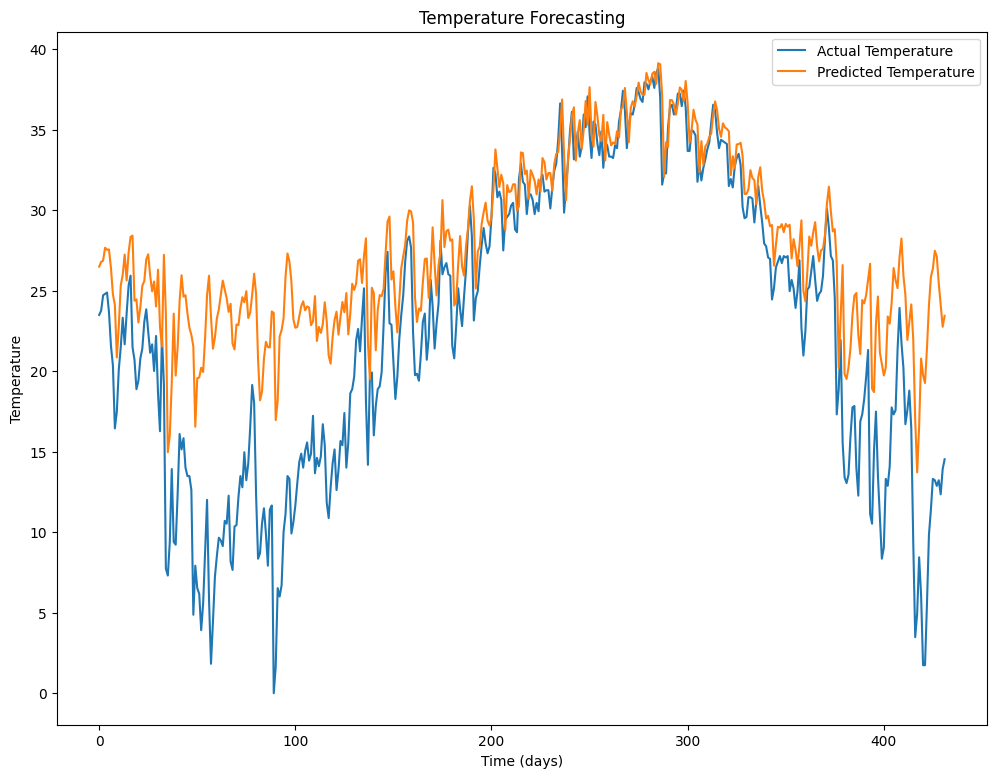

In [31]:
# . 모델 생성 및 학습
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])     # 7일치 입력 데이터
        y.append(data[i + time_steps])       # 다음날 온도
    return np.array(X), np.array(y)


time_steps = 7
X_train, y_train = create_sequences(train_data, time_steps)
X_val, y_val = create_sequences(val_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

model = Sequential()

# model.add(LSTM(32, activation='tanh', return_sequences=False, input_shape=(time_steps, 1)))
model.add(SimpleRNN(64,activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')  # MSE(평균제곱오차) 사용

model.summary()

model.fit(
    X_train, y_train,
    epochs=100,              # epoch 수
    batch_size=16,           # 배치 크기
    validation_data=(X_val, y_val))  # 검증 데이터

# 테스트 데이터 예측
pred = model.predict(X_test)

# 스케일링 복원
pred_n = pred * scaler.data_max_
y_test_n = y_test * scaler.data_max_

# RMSE 계산
rmse = np.mean(losses.mean_squared_error(pred_n, y_test_n)) ** 0.5
print('# RMSE:', rmse)

# 그래프 그리기
plt.figure(figsize=(12, 9))

plt.plot(y_test_n, label='Actual Temperature')     # 실제 온도
plt.plot(pred_n, label='Predicted Temperature')    # 예측 온도

plt.title('Temperature Forecasting')
plt.xlabel('Time (days)')
plt.ylabel('Temperature')
plt.legend()
plt.show()